# [**AdaBoost à deux classes**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_11_ensembles/plot_adaboost_twoclass.ipynb)<br/>([_Two-class AdaBoost_](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html))

Cet exemple adapte une souche de décision AdaBoosted sur un ensemble de données de classification non linéairement séparable composé de deux groupes de « quantiles gaussiens » (voir [**`sklearn.datasets.make_gaussian_quantiles`**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_gaussian_quantiles.html#sklearn.datasets.make_gaussian_quantiles)) et trace la frontière de décision et les scores de décision. Les distributions des scores de décision sont présentées séparément pour les échantillons des classes A et B. L'étiquette de classe prédite pour chaque échantillon est déterminée par le signe du score de décision. Les échantillons avec des scores de décision supérieurs à zéro sont classés comme B, et sont autrement classés comme A. La magnitude d'un score de décision détermine le degré de similarité avec l'étiquette de classe prédite. De plus, un nouvel ensemble de données pourrait être construit contenant une pureté souhaitée de classe B, par exemple, en sélectionnant uniquement des échantillons avec un score de décision supérieur à une certaine valeur.

C:\Users\franc\AppData\Local\Temp\ipykernel_23992\3699394267.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


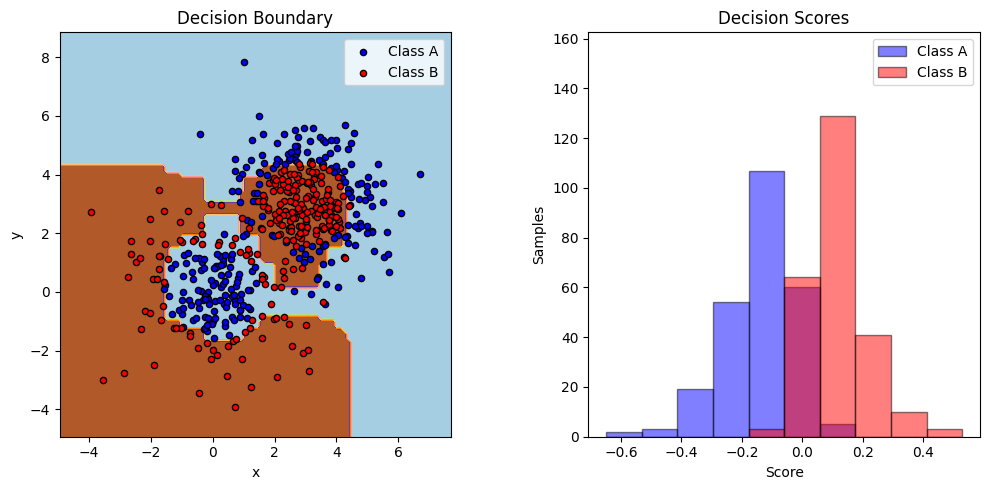

In [1]:
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Construct dataset
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
ax = plt.subplot(121)
disp = DecisionBoundaryDisplay.from_estimator(
    bdt,
    X,
    cmap=plt.cm.Paired,
    response_method="predict",
    ax=ax,
    xlabel="x",
    ylabel="y",
)
x_min, x_max = disp.xx0.min(), disp.xx0.max()
y_min, y_max = disp.xx1.min(), disp.xx1.max()
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label=f"Class {n}",
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")

plt.title("Decision Boundary")

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(
        twoclass_output[y == i],
        bins=10,
        range=plot_range,
        facecolor=c,
        label=f"Class {n}",
        alpha=0.5,
        edgecolor="k",
    )
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc="upper right")
plt.ylabel("Samples")
plt.xlabel("Score")
plt.title("Decision Scores")

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()